# Pymaceuticals Inc.
---

### Analysis
The study analyzed the effects of different drug regimens on tumor volume and the relationship between mouse weight and tumor growth under the Capomulin treatment. Here are the key observations:

1. **Tumor Volume Distribution by Drug Regimen:**
- The box plot analysis revealed variations in final tumor volumes across different drug regimens. Among the four drugs studied (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin and Ramicane showed the **lowest average tumor volumes**, indicating better efficacy in tumor reduction compared to Infubinol and Ceftamin.
- Infubinol had one significant outlier, suggesting variability in its effectiveness, while Capomulin, Ramicane, and Ceftamin did not exhibit potential outliers.

2. **Distribution of Mouse Timepoints (Bar Chart):**
- The bar chart displayed the **number of observed mouse timepoints for each drug regimen**, with Capomulin and Ramicane having the highest number of observations. This suggests that these two drugs were more frequently monitored, possibly due to their effectiveness or safety in reducing tumor size.

3. **Gender Distribution of Mice (Pie Chart):**
- The pie chart showed an almost equal distribution of male and female mice used in the study, with 50.4% male and 49.6% female. This balanced representation ensures that the analysis of drug effects on tumor growth is not biased by gender differences, providing a more accurate assessment of drug efficacy.

4. **Relationship Between Mouse Weight and Tumor Volume:**
- The scatter plot for the Capomulin regimen indicated a **positive linear correlation** between mouse weight and average tumor volume. The correlation coefficient was **0.84**, suggesting a strong relationship between these variables.
- The linear regression model, with a slope of **0.95**, indicates that average tumor volume increases significantly with mouse weight.

5- **Capomulin Treatment Over Time:**
* The line plot of tumor volume over time for a specific mouse treated with Capomulin demonstrated a **steady decrease in tumor volume**, highlighting the drug's effectiveness in reducing tumor size over time.
  
Overall, the results suggest that Capomulin and Ramicane are the most effective regimens for tumor reduction. The distribution of observations and gender indicates well-balanced experimental conditions, strengthening the validity of the findings.

 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mice_ids)]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume, 
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
    })

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_stats_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

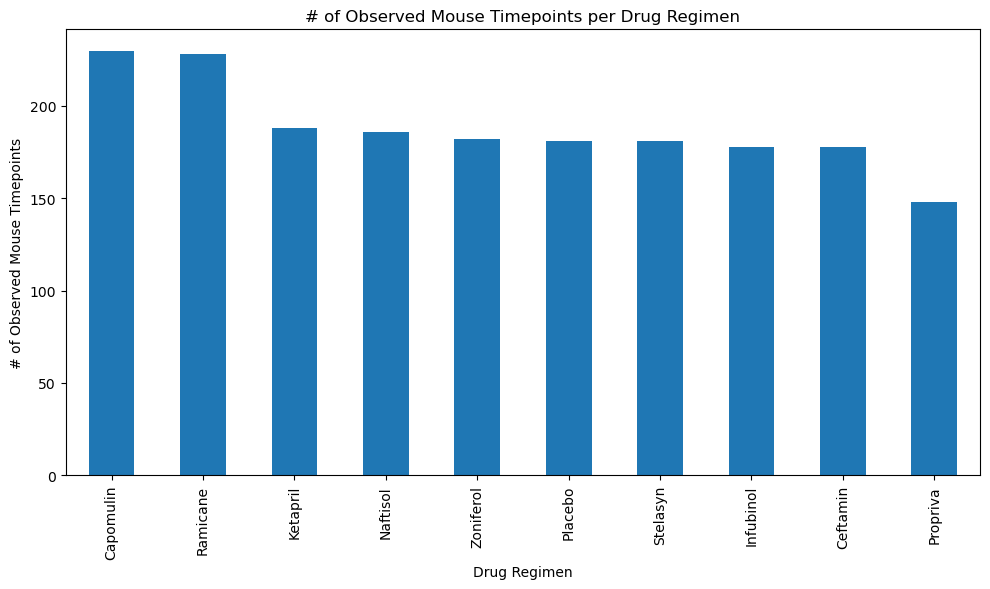

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter the DataFrame to get the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_timepoints = cleaned_data["Drug Regimen"].value_counts()

# Set the index name to 'Drug Regimen' to use as labels
drug_timepoints.index.name = "Drug Regimen"

# Use DataFrame.plot() to create a bar chart of the data
drug_regimen_chart = drug_timepoints.plot(kind="bar", figsize=(10, 6))

# Set title and labels for the chart
drug_regimen_chart.set_xlabel("Drug Regimen")
drug_regimen_chart.set_ylabel("# of Observed Mouse Timepoints")
drug_regimen_chart.set_title("# of Observed Mouse Timepoints per Drug Regimen")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

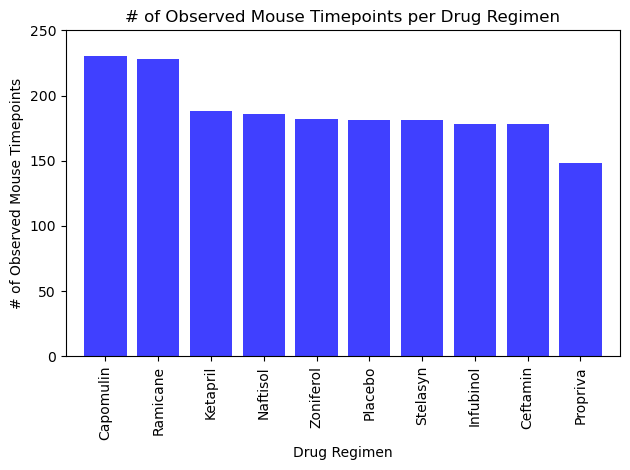

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_timepoints = cleaned_data["Drug Regimen"].value_counts()

# Create an array for the x-axis positions
x_axis = np.arange(len(drug_timepoints))

# Create the bar chart
plt.bar(x_axis, drug_timepoints.values, color='b', alpha=0.75, align='center')

# Set the tick locations and labels for the x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_timepoints.index, rotation="vertical")

# Set the x limits of the chart
plt.xlim(-0.75, len(x_axis) - 0.25)

# Set the y limits of the chart
plt.ylim(0, max(drug_timepoints.values) + 20)

# Add title and labels
plt.title("# of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.tight_layout()
plt.show()


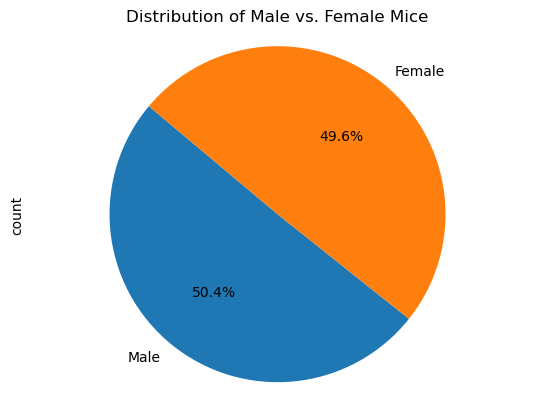

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = cleaned_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart based on gender distribution
gender_pie = gender_counts.plot(
    kind="pie",
    y="Sex",
    autopct="%1.1f%%",
    startangle=140,
    title="Distribution of Male vs. Female Mice",
)

# Set yLabel
gender_pie.set_ylabel("count")

# Make the axis equal to ensure the pie chart is circular
plt.axis("equal")

# Show the plot
plt.show()


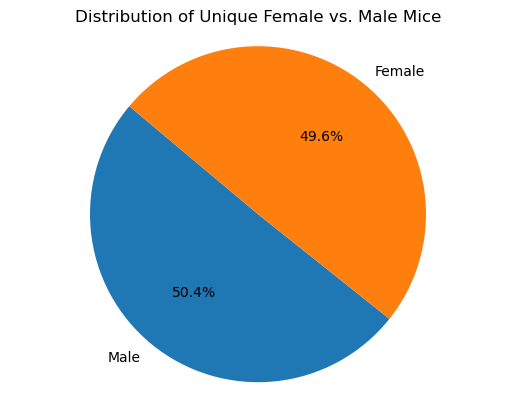

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = cleaned_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Labels for the sections of the pie chart
labels = gender_counts.index

# The values of each section of the pie chart
sizes = gender_counts.values

# The colors of each section of the pie chart
colors = ["#1f77b4", "#ff7f0e"]

# Make the pie chart
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140
)

# Set equal axis to ensure the pie chart is circular
plt.axis("equal")

# Set the title of the pie chart
plt.title("Distribution of Unique Female vs. Male Mice")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = selected_regimens.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(max_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the first few rows of the final tumor volume DataFrame
final_tumor_volumes.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


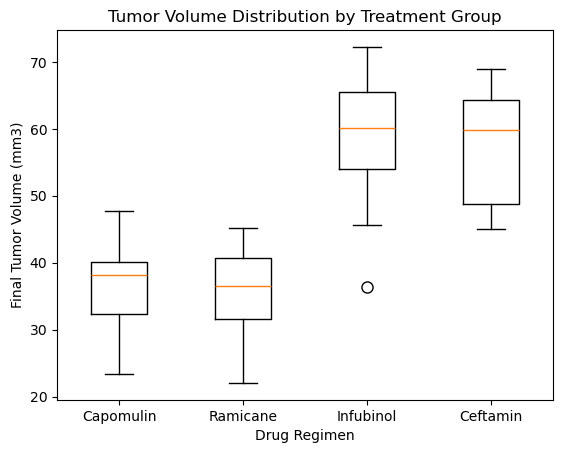

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Set up the figure and axis for the box plot
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

In [36]:
# Filter the data to include only mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Display the unique Mouse IDs treated with Capomulin
capomulin_mouse_ids = capomulin_data["Mouse ID"].unique()
print("Mouse IDs treated with Capomulin:", capomulin_mouse_ids)


Mouse IDs treated with Capomulin: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


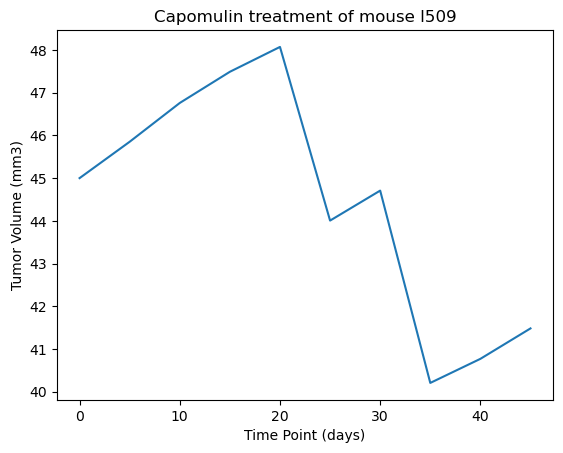

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"  # Replace with any specific Mouse ID treated with Capomulin
mouse_data = cleaned_data[(cleaned_data["Mouse ID"] == mouse_id) & (cleaned_data["Drug Regimen"] == "Capomulin")]

# Generate the line plot for tumor volume vs. time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


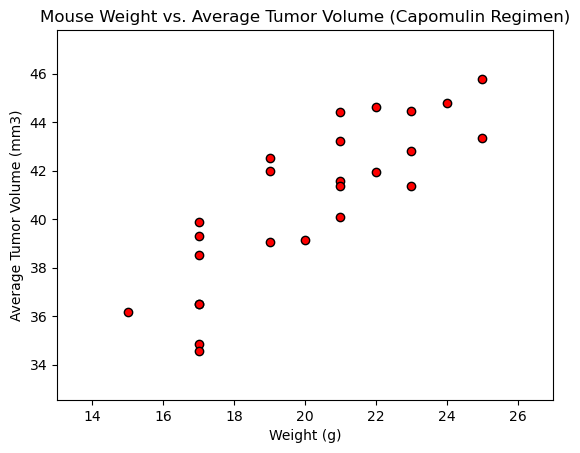

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weights, avg_tumor_volume, marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(min(avg_tumor_volume)-2, max(avg_tumor_volume)+2)

# Set the upper and lower limits of our x axis
plt.xlim(min(mouse_weights)-2, max(mouse_weights)+2)

# Create a title, x label, and y label for our chart
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

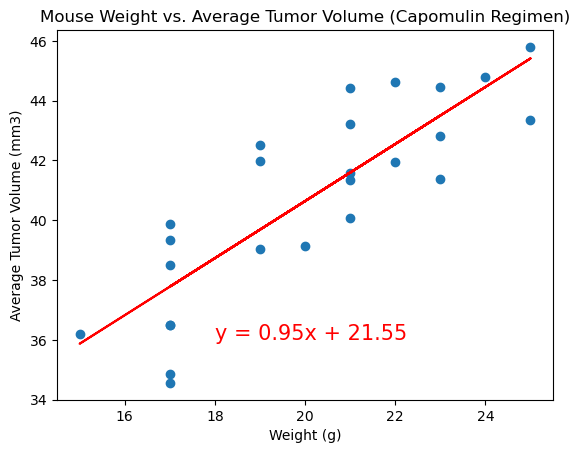

The correlation between mouse weight and the average tumor volume is 0.84


In [43]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, avg_tumor_volume)

# Calculate the regression values (y-values) for the line
regress_values = mouse_weights * slope + intercept

# Create the equation of the line for display
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Generate scatter plot
plt.scatter(mouse_weights, avg_tumor_volume)

# Plot the linear regression line
plt.plot(mouse_weights, regress_values, "r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (18, 36), fontsize=15, color="red")

# Create title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

# Print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

